# Odds generator (Double Chance Full Time 1/2)

In [213]:
from fastai.tabular import *

In [214]:
path = Path('./')
df = pd.read_csv(path/'bigdata.csv', sep=';')

In [215]:
df.head()

,ID,MRFT_HOME,MRFT_DRAW,MRFT_AWAY,OUFT2.5_OVER,OUFT2.5_UNDER,BTS_YES,BTS_NO,MRHT_HOME,MRHT_DRAW,MRHT_AWAY,MRSH_HOME,MRSH_DRAW,MRSH_AWAY,DCFT_HOME_AWAY,DCFT_HOME_DRAW,DCFT_DRAW_AWAY
0,5a22b9dd1d14229d5d8b4569,1.63,3.90,4.30,1.52,2.27,1.58,2.13,2.10,2.47,4.50,1.90,2.76,4.25,1.21,1.18,2.11
1,5942651c1d1422030c8b4586,6.00,3.70,1.62,1.96,1.81,1.94,1.80,5.80,2.22,2.08,5.60,2.59,1.92,1.27,2.28,1.12
2,5942651c1d1422030c8b4587,2.30,3.15,3.30,1.96,1.81,1.76,1.98,2.79,2.12,3.65,2.60,2.44,3.45,1.34,1.33,1.61
3,594265291d1422030c8b45f4,1.78,3.50,4.85,2.01,1.77,1.94,1.80,2.28,2.16,4.95,2.11,2.50,4.80,1.29,1.17,2.03
4,5a0862a91d1422425d8b4567,1.96,2.98,3.25,2.17,1.44,1.89,1.60,2.56,1.87,3.90,2.33,2.10,3.60,1.22,1.18,1.56


In [216]:
dep_var = 'DCFT_HOME_AWAY'
cont_names = ['MRFT_HOME', 'MRFT_DRAW', 'MRFT_AWAY', 'OUFT2.5_OVER', 'OUFT2.5_UNDER', 'BTS_YES', 'BTS_NO']
cat_names = []
procs = []

In [217]:
test = TabularList.from_df(df.iloc[800:1500].copy(), path=path, cat_names=cat_names, cont_names=cont_names)

In [218]:
data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(800,1500)))
                           .label_from_df(cols=dep_var)
                           .add_test(test, label=0)
                           .databunch())

In [219]:
data.show_batch(rows=5)

MRFT_HOME,MRFT_DRAW,MRFT_AWAY,OUFT2.5_OVER,OUFT2.5_UNDER,BTS_YES,BTS_NO,target
2.2200,3.3000,2.8500,1.8800,1.7500,1.6300,2.0500,1.25
2.5900,3.5500,2.2900,1.5500,2.1800,1.4400,2.4500,1.21
2.6500,3.2000,2.3000,1.8600,1.6800,1.6000,2.0600,1.24
2.5900,3.2000,2.5900,2.0900,1.6600,1.7100,2.0100,1.28
1.4600,4.2000,5.5000,1.4900,2.3300,1.5900,2.1100,1.15


In [220]:
learn = tabular_learner(data, layers=[200,100], metrics=mean_squared_error)

In [221]:
learn.fit(5, 1e-2)

epoch,train_loss,valid_loss,mean_squared_error,time
0,0.002133,0.004486,0.004486,00:05
1,0.000967,0.000471,0.000471,00:05
2,0.000697,0.001121,0.001121,00:05
3,0.000679,0.000755,0.000755,00:05
4,0.000560,0.000989,0.000989,00:05


In [222]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


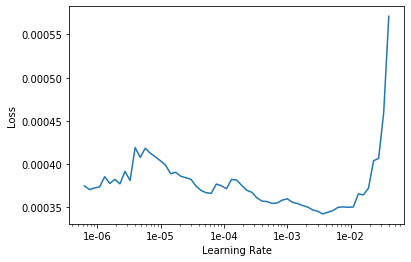

In [223]:
learn.lr_find()
learn.recorder.plot()

In [224]:
learn.fit(10, 1e-3)

epoch,train_loss,valid_loss,mean_squared_error,time
0,0.000387,0.001040,0.001040,00:05
1,0.000421,0.000243,0.000243,00:05
2,0.000368,0.000347,0.000347,00:05
3,0.000330,0.000565,0.000565,00:05
4,0.000349,0.000955,0.000955,00:05
5,0.000330,0.000705,0.000705,00:05
6,0.000357,0.000547,0.000547,00:05
7,0.000281,0.000332,0.000332,00:05
8,0.000305,0.000453,0.000453,00:05
9,0.000305,0.000790,0.000790,00:05


## Prod

In [226]:
learn.export(file='dcft-home-away.pkl')

In [227]:
learn = load_learner(path, file='dcft-home-away.pkl')

In [228]:
row = df.iloc[0]
row.__class__

pandas.core.series.Series

In [229]:
learn.predict(row)

(FloatItem [1.201651], tensor([1.2017]), tensor([1.2017]))

In [230]:
# manual example 1
test = pd.Series({'MRFT_HOME':2.6,
                  'MRFT_DRAW':3.3,
                  'MRFT_AWAY':2.6,
                  'OUFT2.5_OVER':1.86,
                  'OUFT2.5_UNDER':1.86,
                  'BTS_YES':1.71,
                  'BTS_NO':2.01})
learn.predict(test) # 1/2=1.26 1/X=1.41 X/2=1.41

(FloatItem [1.268831], tensor([1.2688]), tensor([1.2688]))

In [231]:
# manual example 2
test = pd.Series({'MRFT_HOME':1.8,
                  'MRFT_DRAW':3.55,
                  'MRFT_AWAY':4.25,
                  'OUFT2.5_OVER':1.93,
                  'OUFT2.5_UNDER':1.8,
                  'BTS_YES':1.85,
                  'BTS_NO':1.85})
learn.predict(test) # 1/2=1.23 1/X=1.16 X/2=1.88

(FloatItem [1.258653], tensor([1.2587]), tensor([1.2587]))

In [232]:
# manual example 2
test = pd.Series({'MRFT_HOME':1.93,
                  'MRFT_DRAW':3.45,
                  'MRFT_AWAY':3.5,
                  'OUFT2.5_OVER':1.74,
                  'OUFT2.5_UNDER':1.93,
                  'BTS_YES':1.61,
                  'BTS_NO':2.12})
learn.predict(test) # 1/2=1.22 1/X=1.21 X/2=1.7

(FloatItem [1.244316], tensor([1.2443]), tensor([1.2443]))